In [1]:
import pandas as pd
from pathlib import Path
from glob import glob

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.legend import Legend
from matplotlib.lines import Line2D

%matplotlib inline
mpl.rcParams['figure.dpi'] = 200 # bigger figures, yayy!

from convergence_plots import calculate_num_order, plot_marked_var, \
    plot_parametrized_var, plot_agregated_var


In [2]:
folder = Path(r"outputs/parametric/example_dg_burgess2D_kucera//")
df = pd.DataFrame()
for file in folder.glob("*.csv"):
    df = df.append(
        calculate_num_order(pd.read_csv(file).assign(expid=file.name.split("r")[0].replace("_", "")))
    )
df["1/h-2"] = 1/df["h"]**2

In [3]:
orders = df["order"].unique()
orders

cgels = df["gel"].unique()
cgels

diffcoefs = df["diffcoef"].unique()
diffcoefs

cws = df["cw"].unique()
cws

array([  1.,   5.,  15.])

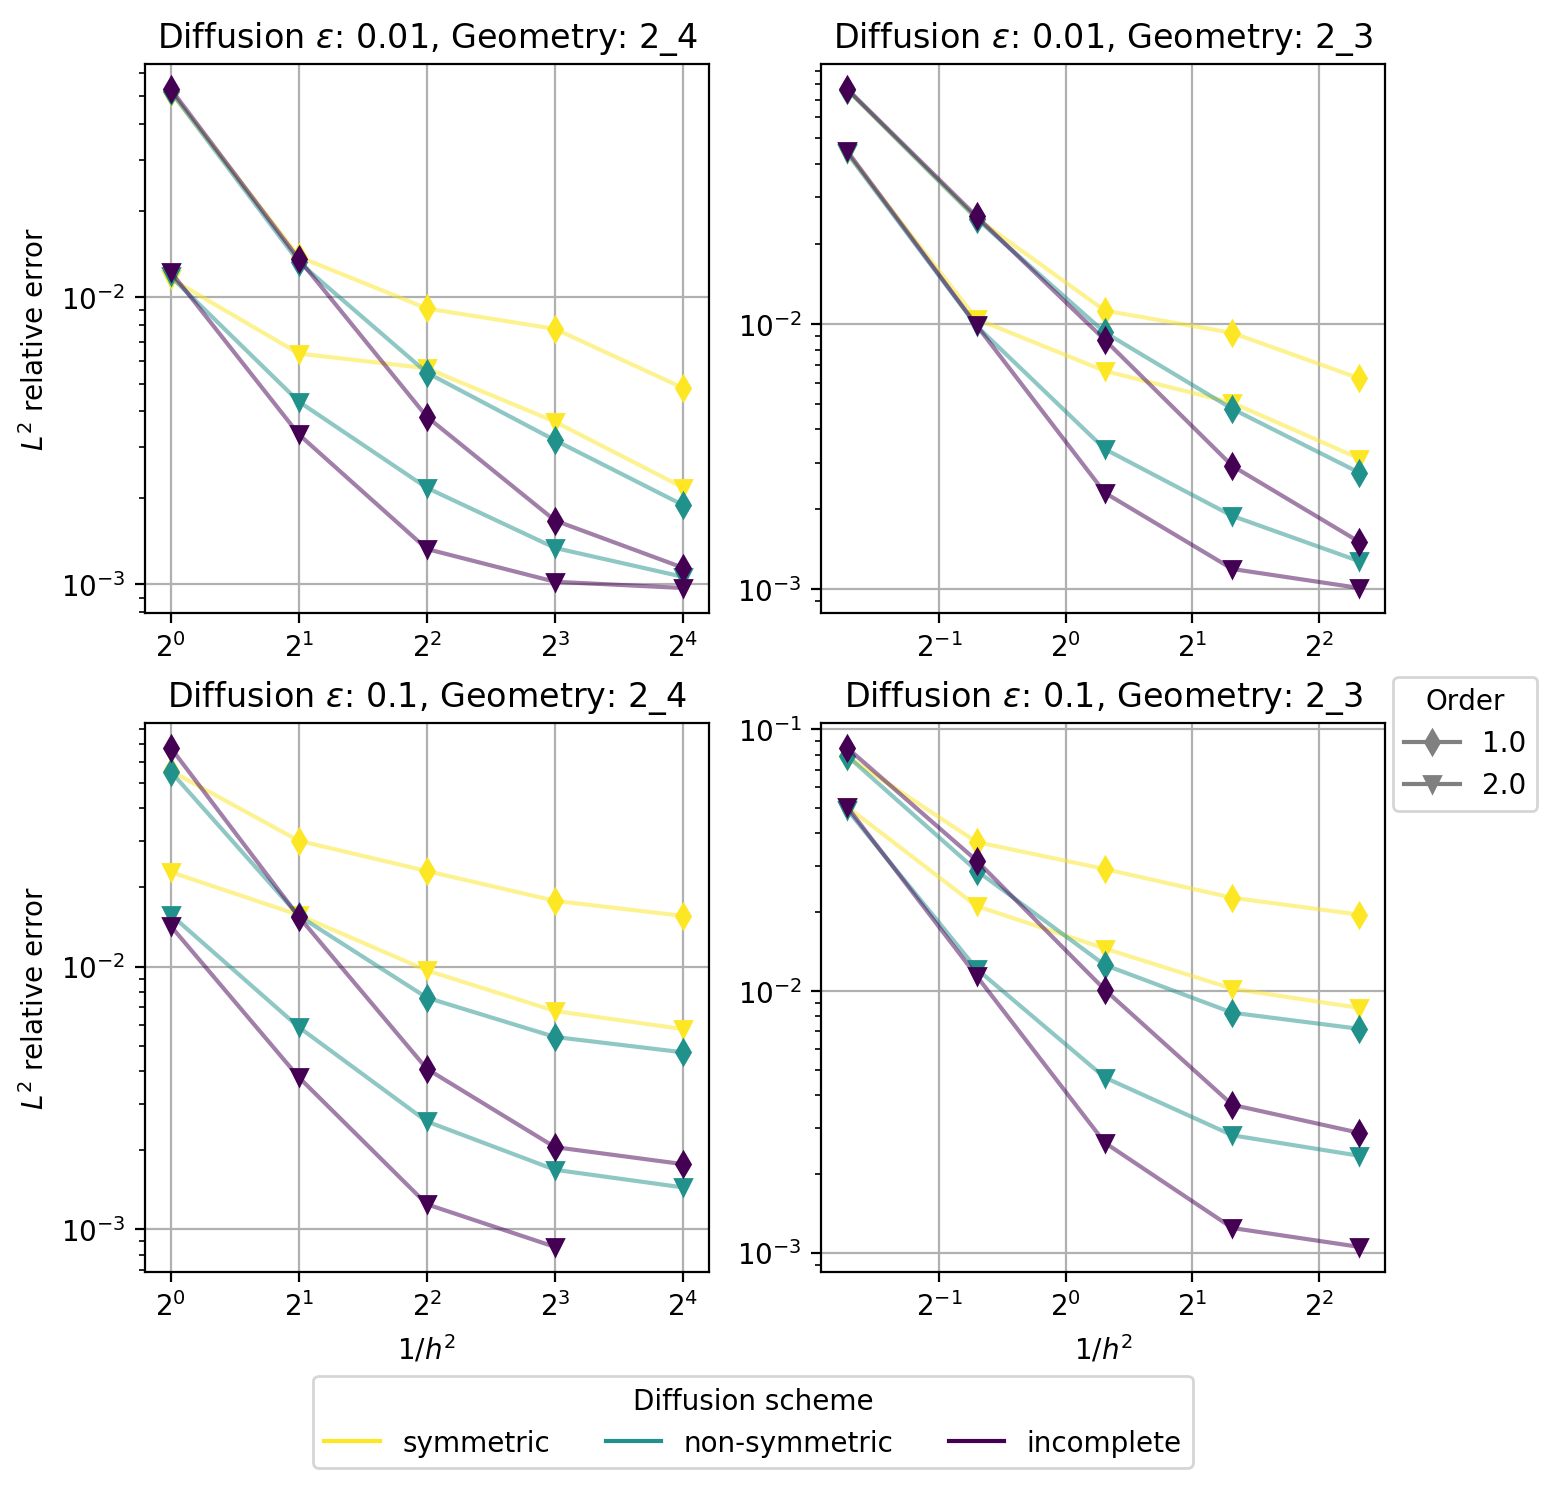

In [5]:
f = plot_parametrized_var(df,
                       y_var="diff_l2", y_lab="$L^2$ relative error",
                       x_var="1/h-2", x_lab="$1/h^2$",
                       row_var="diffcoef", row_lab="Diffusion $\\varepsilon$",
                       column_var="gel", column_lab="Geometry",
                       color_var="diffscheme", color_lab="Diffusion scheme",
                       alpha=.5
                       )

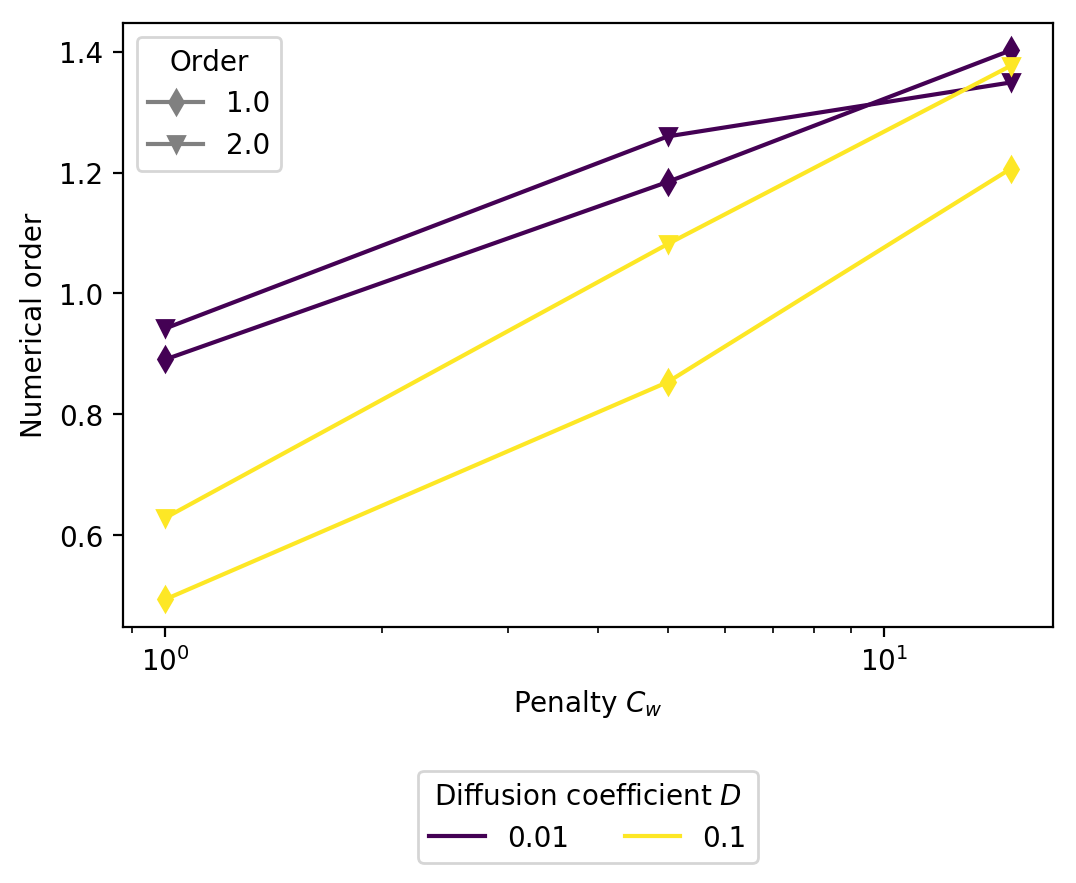

In [8]:
fe = plot_agregated_var(df[(df["gel"] == "2_3")], 
                        var="num_order",
                        x_var="cw", colored_var="diffcoef",
                        labels=("Penalty $C_w$", "Diffusion coefficient $D$"),
                        ylogscale=False)

In [12]:
df[(df["gel"] == "2_3") & 
   (df["diffcoef"] == 0.01)][["h", "1/h-2", "n_cells", "n_dof", "order", "diff_l2", "num_order"]]

,h,1/h-2,n_cells,n_dof,order,diff_l2,num_order
0,1.818167,0.302505,16.0,48.0,1.0,0.076347,NaN
1,1.275748,0.614427,64.0,192.0,1.0,0.024995,1.575803
2,0.898174,1.239594,256.0,768.0,1.0,0.011215,1.141860
3,0.633635,2.490699,1024.0,3072.0,1.0,0.009245,0.276920
4,0.447512,4.993329,4096.0,12288.0,1.0,0.006224,0.568739
5,1.818167,0.302505,16.0,96.0,2.0,0.044075,NaN
6,1.275748,0.614427,64.0,384.0,2.0,0.010431,2.033765
7,0.898174,1.239594,256.0,1536.0,2.0,0.006642,0.643173
8,0.633635,2.490699,1024.0,6144.0,2.0,0.005037,0.396426
9,0.447512,4.993329,4096.0,24576.0,2.0,0.003106,0.695078
